In [1]:
## importing functions
from __future__ import division, print_function
import sys
sys.path.append('/home/damingshen/Code_sub_Rad_AI/')
import CNN_rCS_4L
import Load_slice_6RespState_batch
import math
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import tensorflow as tf
import tensorflow as tf
import os
plt.rcParams['image.cmap'] = 'gray'

In [2]:
## Specifying GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.Session(config=config)

2019-05-06 11:14:12,741 Layers 4, depth 16, spatial filter size 3x3, temporal filter size: 3


Instructions for updating:
Colocations handled automatically by placer.


2019-05-06 11:14:12,767 From /home/damingshen/.local/lib/python3.7/site-packages/tensorflow/python/framework/op_def_library.py:263: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


2019-05-06 11:14:12,821 From /home/damingshen/Code_sub_Rad_AI/CNN_rCS_4L.py:67: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use standard file APIs to check for files with this prefix.


2019-05-06 11:14:13,923 From /home/damingshen/.local/lib/python3.7/site-packages/tensorflow/python/training/saver.py:1266: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


INFO:tensorflow:Restoring parameters from /home/damingshen/Code_sub_Rad_AI/Model_keep/f16_L4/model.ckpt


2019-05-06 11:14:13,926 Restoring parameters from /home/damingshen/Code_sub_Rad_AI/Model_keep/f16_L4/model.ckpt
2019-05-06 11:14:13,949 Model restored from file: /home/damingshen/Code_sub_Rad_AI/Model_keep/f16_L4/model.ckpt


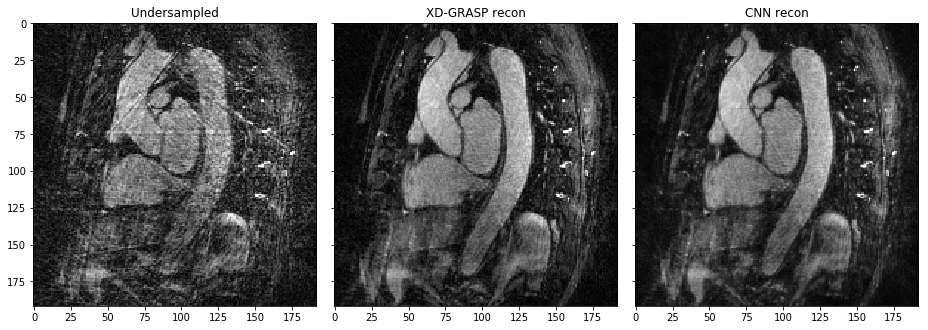

In [3]:
#Recon using CNN for benvw
import Load_slice_6RespState_batch
#location of undersampled slice + time data sets for testing
search_path_zp = "/home/damingshen/Code_sub_Rad_AI/Testing/ZeroFilled/"
#location of XD-GRASP reconstructed slice + time data sets for testing
search_path_rc = "/home/damingshen/Code_sub_Rad_AI/Testing/CSrecon/"
#Each _zp.mat file contains the zero-filled (i.e. undersampled) images for a single slice + associated 6 respiratory time frames for a given testing patient 
#Each _rc.mat file contains the XD-GRASP (i.e. recostructed) a images for single slice + associated 6 respiratory time frames for a given testing patient 

data_images = Load_slice_6RespState_batch.Slice_Provider(search_path_zp,search_path_rc,
                                        zp_suffix="_zp.mat",rc_suffix="_rc.mat",scale_factor = 1)
x_valid=data_images.data[0]
y_valid=data_images.data[1]

import CNN_rCS_4L
#location of trained model 
path_model = "/home/damingshen/Code_sub_Rad_AI/Model_keep/f16_L4/model.ckpt"
CNN_rCS_f16_L4 = CNN_rCS_4L.Sequential_network(depth = 16, filter_size_space=3, fliter_size_time = 3,type_train = 'Testing')
prediction = CNN_rCS_f16_L4.predict(path_model, x_valid)
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(13,5))
fig_num = 0
ax[0].imshow(x_valid[0,:,:,1,0], vmin=0,vmax=0.35)
ax[1].imshow(y_valid[0,:,:,1,0], vmin=0,vmax=0.35)
ax[2].imshow(prediction[0,:,:,1,0],vmin=0,vmax=0.35)

ax[0].set_title("Undersampled")
ax[1].set_title("XD-GRASP recon")
ax[2].set_title("CNN recon")

fig.tight_layout()
plt.show()